# 高德地图作业

In [2]:
import pandas as pd
import requests

## 地理/逆地理编码

### 地理编码

In [4]:
def geocode(address,city=None,batch=None,sig=None)->dict:
    """获取地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/geo?parameters'
    params={
        'key': "9f7b177f4227578e1842731c2bb198e6",
        'address':'广东省广州市第三中学',
#         'city':"广州市"’,
        'batch':True,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [5]:
市三中 = geocode('广东省广州市第三中学')
市三中

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '1',
 'geocodes': [{'formatted_address': '广东省广州市越秀区广州市第三中学',
   'country': '中国',
   'province': '广东省',
   'citycode': '020',
   'city': '广州市',
   'district': '越秀区',
   'township': [],
   'neighborhood': {'name': [], 'type': []},
   'building': {'name': [], 'type': []},
   'adcode': '440104',
   'street': [],
   'number': [],
   'location': '113.258953,23.114944',
   'level': '兴趣点'}]}

In [6]:
df = pd.json_normalize(市三中['geocodes'])
df

,formatted_address,country,province,citycode,city,district,township,adcode,street,number,location,level,neighborhood.name,neighborhood.type,building.name,building.type
0,广东省广州市越秀区广州市第三中学,中国,广东省,020,广州市,越秀区,[],440104,[],[],"113.258953,23.114944",兴趣点,[],[],[],[]


### 逆地理编码

#### 基础逆地理编码分析

In [8]:
def regeocode(location,poitype=None,radius=None,extensions="base",batch=False,roadlevel=None,sig=None,homeorcorp=None)->dict:
    """获取逆地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/regeo?parameters'
    params={
        'key': "9f7b177f4227578e1842731c2bb198e6",
#         'address':'广东省广州市第三中学',
        'location': '113.258953,23.114944',
        'poitype':141202,
        'radius':100,
        'extensions':'base',
        'batch': True,
        'roadlevel':0,
        'homeorcorp':0,
#         'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
市三中逆地理编码_base = regeocode(市三中)
print(市三中逆地理编码_base)
df_市三中逆地理编码_base = pd.json_normalize(市三中逆地理编码_base).T
display(df_市三中逆地理编码_base)

{'status': '1', 'info': 'OK', 'infocode': '10000', 'regeocode': {'formatted_address': '广东省广州市越秀区人民街道大新路163号广州市第三中学', 'addressComponent': {'country': '中国', 'province': '广东省', 'city': '广州市', 'citycode': '020', 'district': '越秀区', 'adcode': '440104', 'township': '人民街道', 'towncode': '440104010000', 'neighborhood': {'name': [], 'type': []}, 'building': {'name': [], 'type': []}, 'streetNumber': {'street': '大新路', 'number': '163号', 'location': '113.258968,23.1149319', 'direction': '东南', 'distance': '2.02919'}, 'businessAreas': [{'location': '113.25798,23.115167', 'name': '大新', 'id': '440104'}]}}}


,0
status,1
info,OK
infocode,10000
regeocode.formatted_address,广东省广州市越秀区人民街道大新路163号广州市第三中学
regeocode.addressComponent.country,中国
regeocode.addressComponent.province,广东省
regeocode.addressComponent.city,广州市
regeocode.addressComponent.citycode,020
regeocode.addressComponent.district,越秀区
regeocode.addressComponent.adcode,440104


#### 全部逆地理编码分析

In [9]:
def regeocode(location,poitype=None,radius=None,extensions="all",batch=False,roadlevel=None,sig=None,homeorcorp=None)->dict:
    """获取逆地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/regeo?parameters'
    params={
        'key': "9f7b177f4227578e1842731c2bb198e6",
#         'address':'广东省广州市第三中学',
        'location': '113.258953,23.114944',
        'poitype':141202,
        'radius':100,
        'extensions':'all',
        'batch': True,
        'roadlevel':1,
        'homeorcorp':1,
#         'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
市三中逆地理编码_all = regeocode(市三中)
print(市三中逆地理编码_all)
df_市三中逆地理编码_all = pd.json_normalize(市三中逆地理编码_all).T
display(df_市三中逆地理编码_all)

{'status': '1', 'info': 'OK', 'infocode': '10000', 'regeocode': {'formatted_address': '广东省广州市越秀区人民街道大新路163号广州市第三中学', 'addressComponent': {'country': '中国', 'province': '广东省', 'city': '广州市', 'citycode': '020', 'district': '越秀区', 'adcode': '440104', 'township': '人民街道', 'towncode': '440104010000', 'neighborhood': {'name': [], 'type': []}, 'building': {'name': [], 'type': []}, 'streetNumber': {'street': '大新路', 'number': '163号', 'location': '113.258968,23.1149319', 'direction': '东南', 'distance': '2.02919'}, 'businessAreas': [{'location': '113.25798,23.115167', 'name': '大新', 'id': '440104'}]}, 'pois': [{'id': 'B00140T9YK', 'name': '广州市第三中学', 'type': '科教文化服务;学校;中学', 'tel': '020-83336692;020-83345320', 'direction': '东南', 'distance': '2.02919', 'location': '113.258968,23.114932', 'address': '大新路163号广州市第三中学体育馆', 'poiweight': '0.576818', 'businessarea': '大新'}, {'id': 'B0FFFQ0UYH', 'name': '广州市越秀区明德实验学校', 'type': '科教文化服务;学校;中学', 'tel': '020-83230957', 'direction': '东南', 'distance': '95.6279', 'loca

,0
status,1
info,OK
infocode,10000
regeocode.formatted_address,广东省广州市越秀区人民街道大新路163号广州市第三中学
regeocode.addressComponent.country,中国
regeocode.addressComponent.province,广东省
regeocode.addressComponent.city,广州市
regeocode.addressComponent.citycode,020
regeocode.addressComponent.district,越秀区
regeocode.addressComponent.adcode,440104


#### 全部逆地理编码分析细节

In [11]:
roads = pd.json_normalize(市三中逆地理编码_all['regeocode']['roads'])
roadinters = pd.json_normalize(市三中逆地理编码_all['regeocode']['roadinters'])
aois = pd.json_normalize(市三中逆地理编码_all['regeocode']['aois'])
pois = pd.json_normalize(市三中逆地理编码_all['regeocode']['pois'])
display(roads,roadinters,aois,pois)

""


""


,id,name,adcode,location,area,distance,type
0,B00140T9YK,广州市第三中学,440104,"113.258968,23.114932",27835.297184,0,141202
1,B0FFFQ0UYH,广州市越秀区明德实验学校,440104,"113.259656,23.114377",3286.601798,43.6566,141202


,id,name,type,tel,direction,distance,location,address,poiweight,businessarea
0,B00140T9YK,广州市第三中学,科教文化服务;学校;中学,020-83336692;020-83345320,东南,2.02919,"113.258968,23.114932",大新路163号广州市第三中学体育馆,0.576818,大新
1,B0FFFQ0UYH,广州市越秀区明德实验学校,科教文化服务;学校;中学,020-83230957,东南,95.6279,"113.259656,23.114377",旧部前56-3号,0.395197,大新


## 步行规划

In [13]:
import pandas as pd
import requests
def geocode(address,city=None,batch=None,sig=None)->dict:
    """获取地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/geo?parameters'
    params={
        'key': "9f7b177f4227578e1842731c2bb198e6",
        'address':'广东省广州市朝天小学',
#         'city':"广州市"’,
        'batch':True,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
朝天小学 = geocode('广东省广州市朝天小学')
朝天小学   ### 获得目的地的定位

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '1',
 'geocodes': [{'formatted_address': '广东省广州市越秀区朝天小学',
   'country': '中国',
   'province': '广东省',
   'citycode': '020',
   'city': '广州市',
   'district': '越秀区',
   'township': [],
   'neighborhood': {'name': [], 'type': []},
   'building': {'name': [], 'type': []},
   'adcode': '440104',
   'street': [],
   'number': [],
   'location': '113.260032,23.124473',
   'level': '兴趣点'}]}

In [14]:
def walking(origin,destination,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/walking?parameters'
    params={
        'key':"9f7b177f4227578e1842731c2bb198e6",
        'origin':'113.258953,23.114944',
        'destination':'113.260032,23.124473',
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [16]:
朝天小学 = geocode('广东省广州市朝天小学')
朝天小学_location = 朝天小学['geocodes'][0]['location']
市三中_location = 市三中['geocodes'][0]['location']
市三中_朝天小学 = walking(市三中_location,朝天小学_location)
市三中_朝天小学

{'status': '1',
 'info': 'ok',
 'infocode': '10000',
 'count': '1',
 'route': {'origin': '113.258953,23.114944',
  'destination': '113.260032,23.124473',
  'paths': [{'distance': '1184',
    'duration': '947',
    'steps': [{'instruction': '沿大新路向东步行280米左转',
      'orientation': '东',
      'road': '大新路',
      'distance': '280',
      'duration': '224',
      'polyline': '113.258377,23.11576;113.258377,23.11576;113.258377,23.11576;113.258702,23.11582;113.258702,23.11582;113.259266,23.115929;113.259266,23.115929;113.260082,23.116089;113.260082,23.116089;113.260664,23.11622;113.260664,23.11622;113.261059,23.116311',
      'action': '左转',
      'assistant_action': [],
      'walk_type': '0'},
     {'instruction': '向北步行91米右转',
      'orientation': '北',
      'road': [],
      'distance': '91',
      'duration': '73',
      'polyline': '113.261059,23.116311;113.261042,23.116454;113.261042,23.116454;113.260972,23.116771;113.260972,23.116771;113.26092,23.11714',
      'action': '右转',
      'as

In [17]:
df = pd.json_normalize(市三中_朝天小学["route"]["paths"][0]['steps'])
display(df)
df["instruction"]

,instruction,orientation,road,distance,duration,polyline,action,assistant_action,walk_type
0,沿大新路向东步行280米左转,东,大新路,280,224,"113.258377,23.11576;113.258377,23.11576;113.25...",左转,[],0
1,向北步行91米右转,北,[],91,73,"113.261059,23.116311;113.261042,23.116454;113....",右转,[],0
2,沿濠畔街向东步行28米左转,东,濠畔街,28,22,"113.260916,23.11714;113.261189,23.117174",左转,[],0
3,步行44米直行,[],[],44,35,"113.261189,23.117174;113.261141,23.117565",直行,[],0
4,步行15米直行,[],[],15,12,"113.26115,23.117569;113.261141,23.117708",直行,[],20
5,向北步行49米左转,北,[],49,39,"113.261137,23.117708;113.261133,23.117956;113....",左转,[],0
6,沿大德路向西步行21米右转,西,大德路,21,17,"113.261128,23.118164;113.26092,23.118164",右转,[],0
7,沿走木街向北步行205米直行,北,走木街,205,164,"113.260916,23.118164;113.26089,23.118767;113.2...",直行,[],0
8,沿米市路向北步行262米直行,北,米市路,262,210,"113.260734,23.120017;113.26069,23.12033;113.26...",直行,[],0
9,沿朝天路向北步行189米到达目的地,北,朝天路,189,151,"113.260404,23.122405;113.260369,23.122687;113....",[],到达目的地,0


0       沿大新路向东步行280米左转
1            向北步行91米右转
2        沿濠畔街向东步行28米左转
3              步行44米直行
4              步行15米直行
5            向北步行49米左转
6        沿大德路向西步行21米右转
7       沿走木街向北步行205米直行
8       沿米市路向北步行262米直行
9    沿朝天路向北步行189米到达目的地
Name: instruction, dtype: object

## 行政区域查询

In [19]:
def district(keywords,subdistrict=None,page=None,offset=None,extensions='base',filter=None,)->dict:
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':'9f7b177f4227578e1842731c2bb198e6',
        'keywords':'310000',
        'subdistrict':2,
        'page':1,
        'offset':20,
        'extensions':'all',
        'filter':filter,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
行政区域 = district(keywords='上海',extensions='all',subdistrict=2)
行政区域
# df_行政区域 = pd.json_normalize(行政区域["districts"][0]['districts'])
# df_行政区域
df_行政区域_2级_上海市 = pd.json_normalize(行政区域["districts"][0]['districts'][0]['districts'])
display(df_行政区域_2级_上海市)


,citycode,adcode,name,center,level,districts
0,021,310151,崇明区,"121.397516,31.626946",district,[]
1,021,310115,浦东新区,"121.567706,31.245944",district,[]
2,021,310120,奉贤区,"121.458472,30.912345",district,[]
3,021,310116,金山区,"121.330736,30.724697",district,[]
4,021,310114,嘉定区,"121.250333,31.383524",district,[]
5,021,310113,宝山区,"121.489934,31.398896",district,[]
6,021,310107,普陀区,"121.392499,31.241701",district,[]
7,021,310101,黄浦区,"121.490317,31.222771",district,[]
8,021,310110,杨浦区,"121.522797,31.270755",district,[]
9,021,310117,松江区,"121.223543,31.03047",district,[]


## 搜索POI

### 关键字搜索

In [22]:
def place_text(keywords,types,city=None,citylimit=None,children=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/text?parameters'
    params={
        'key':"9f7b177f4227578e1842731c2bb198e6",
        'keywords':'上海音乐学院',
        'types':'科教文化服务',
        'city':'上海',
        'citylimit':True,
        'children':1,
        'page':page,
        'extensions':'all',
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

上海_音院 = place_text('大学','高等院校',city="上海市",children=1,extensions='all')
上海_音院


{'status': '1',
 'count': '272',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B00155N15X',
   'parent': [],
   'childtype': [],
   'name': '上海音乐学院汾阳校区',
   'tag': [],
   'type': '科教文化服务;学校;高等院校',
   'typecode': '141201',
   'biz_type': [],
   'address': '汾阳路20号',
   'location': '121.454668,31.213711',
   'tel': '021-64370137;021-64312000',
   'postcode': [],
   'website': 'www.shcmusic.edu.cn',
   'email': [],
   'pcode': '310000',
   'pname': '上海市',
   'citycode': '021',
   'cityname': '上海市',
   'adcode': '310104',
   'adname': '徐汇区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'gridcode': '4621635611',
   'distance': [],
   'navi_poiid': 'H51F010012_74867',
   'entr_location': '121.454913,31.212874',
   'business_area': [],
   'exit_location': [],
   'match': '0',
   'recommend': '3',
   'timestamp': '2020-04-21 00:14:19',
   'alias': [],
   'indoor_map': '0',
   'indoor_data': {'cpid': [], 

In [23]:
df_上海_音院 = pd.json_normalize(上海_音院["pois"])
df_上海_音院_上海音乐学院 = pd.json_normalize(上海_音院["pois"][7]["children"])
display(df_上海_音院,df_上海_音院_上海音乐学院)

,id,parent,childtype,name,tag,type,typecode,biz_type,address,location,...,discount_num,event,children,photos,indoor_data.cpid,indoor_data.floor,indoor_data.truefloor,indoor_data.cmsid,biz_ext.rating,biz_ext.cost
0,B00155N15X,[],[],上海音乐学院汾阳校区,[],科教文化服务;学校;高等院校,141201,[],汾阳路20号,"121.454668,31.213711",...,0,[],"[{'id': ' B0FFFZF3XX ', 'name': ' 上海音乐学院停车场 ',...","[{'title': '外景图', 'url': 'http://store.is.auto...",[],[],[],[],[],[]
1,B0FFFZJHTS,B0FFHC76F3,309,上海音乐学院零陵校区,[],科教文化服务;学校;高等院校,141201,[],零陵路520号,"121.452845,31.188986",...,0,[],"[{'id': ' B0FFFZKUM8 ', 'name': ' 上海音乐学院零陵校区(西...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
2,B0FFFE3VIS,B00155N15X,309,上海音乐学院-音乐剧系,[],科教文化服务;科教文化场所;科教文化场所,140000,[],汾阳路20号7层717,"121.454210,31.212428",...,0,[],[],[],[],[],[],[],[],[]
3,B00155C2AK,B00155N15X,309,上海音乐学院附中,[],科教文化服务;学校;中学,141202,[],东平路9号(近复兴中路),"121.449753,31.208151",...,0,[],"[{'id': ' B0FFG4WGXJ ', 'name': ' 上海音乐学院附中(北门)...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
4,B0FFFOGK86,B00155N15X,309,上海音乐学院南楼,[],科教文化服务;学校;高等院校,141201,[],汾阳路20号,"121.454714,31.213117",...,0,[],"[{'id': ' B0FFGYOKHF ', 'name': ' 上海音乐学院南楼(西南门...",[],[],[],[],[],[],[]
5,B00155LLAU,B00156NT25,309,上海音乐学院实验学校,[],科教文化服务;学校;中学,141202,[],新江湾城殷行路政和路359号,"121.511384,31.327624",...,0,[],"[{'id': ' B0FFFPM0DG ', 'name': ' 上海音乐学院实验学校(东...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.0,[]
6,B00155F8VQ,B00155C2AK,309,上海音乐学院附小,[],科教文化服务;学校;小学,141203,[],东平路9号,"121.450182,31.208331",...,0,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
7,B0FFGYOKWK,B00155N15X,309,上海音乐学院北楼,[],科教文化服务;学校;高等院校,141201,[],淮海中路1399附近,"121.454783,31.213796",...,0,[],"[{'id': ' B0FFGYOKG6 ', 'name': ' 上海音乐学院北楼(西门)...",[],[],[],[],[],[],[]
8,B0FFFE75F3,B00155N15X,309,上海音乐学院-管弦系,[],科教文化服务;科教文化场所;科教文化场所,140000,[],汾阳路20号,"121.454490,31.213909",...,0,[],[],[],[],[],[],[],[],[]
9,B00155GPMY,B00155KJH7,3,上海音乐学院(培训分部),[],科教文化服务;培训机构;培训机构,141400,[],汉中路188汉中广场上海市青少年活动中心,"121.457754,31.241917",...,0,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.0,[]


,id,name,sname,location,address,distance,subtype,typecode
0,B0FFGYOKG6,上海音乐学院北楼(西门),西门,"121.454722,31.213794",淮海中路1399附近,0,门,991000


### 周边搜索

In [25]:
def place_around(location,keywords=None,types=None,city=None,redius=None,sortrule=None,offset=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/around?parameters'
    params={
        'key':'9f7b177f4227578e1842731c2bb198e6',
        'keywords':'教堂',
        'location':'113.258953,23.114944',
        'types':110206,
        'city':'广州市',
        'redius':100,
        'sortrule':'distance',
        'offset':offset,
        'page':1,
        'extensions':'base',
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
市三中_周边POI = place_around(市三中_location)
市三中_周边POI

{'status': '1',
 'count': '16',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B0FFM90N5L',
   'parent': [],
   'childtype': [],
   'name': '主教府',
   'type': '风景名胜;风景名胜;教堂',
   'typecode': '110206',
   'biz_type': 'tour',
   'address': '一德路旧部前56号',
   'location': '113.259454,23.115031',
   'tel': [],
   'distance': '52',
   'biz_ext': [],
   'importance': [],
   'shopid': [],
   'shopinfo': '2',
   'poiweight': [],
   'photos': []},
  {'id': 'B0FFG9J3MV',
   'parent': [],
   'childtype': [],
   'name': '天主教广州总教区主教公署',
   'type': '风景名胜;风景名胜;教堂',
   'typecode': '110206',
   'biz_type': 'tour',
   'address': '元锡巷与白米巷交叉口西北150米',
   'location': '113.259629,23.114916',
   'tel': [],
   'distance': '69',
   'biz_ext': [],
   'importance': [],
   'shopid': [],
   'shopinfo': '2',
   'poiweight': [],
   'photos': []},
  {'id': 'B00140TDLN',
   'parent': [],
   'childtype': [],
   'name': '石室圣心大教堂',
   'type': '风景名胜;风景名胜;教堂',
   'typecode': 

In [26]:
df_市三中_周边POI = pd.json_normalize(市三中_周边POI['pois'])
df_市三中_周边POI

,id,parent,childtype,name,type,typecode,biz_type,address,location,tel,distance,biz_ext,importance,shopid,shopinfo,poiweight,photos
0,B0FFM90N5L,[],[],主教府,风景名胜;风景名胜;教堂,110206,tour,一德路旧部前56号,"113.259454,23.115031",[],52,[],[],[],2,[],[]
1,B0FFG9J3MV,[],[],天主教广州总教区主教公署,风景名胜;风景名胜;教堂,110206,tour,元锡巷与白米巷交叉口西北150米,"113.259629,23.114916",[],69,[],[],[],2,[],[]
2,B00140TDLN,[],[],石室圣心大教堂,风景名胜;风景名胜;教堂,110206,tour,一德路旧部前56号,"113.260084,23.114570",020-83392860,123,[],[],[],2,[],[]
3,B00140UHIZ,[],[],天主教广州总教区石室圣心主教座堂天主堂,风景名胜;风景名胜;教堂,110206,tour,一德路56号,"113.260262,23.114589",[],139,[],[],[],2,[],[]
4,B00140B5B1,[],[],基督教锡安堂,风景名胜;风景名胜;教堂,110206,tour,人民中路392号,"113.253960,23.122862",020-81889054;020-81092403,1018,[],[],[],2,[],[]
5,B00140723A,[],[],基督教光孝堂,风景名胜;风景名胜;教堂,110206,tour,光孝路29号(近西门口地铁站),"113.25571,23.126189",020-81087837,1295,[],[],[],2,[],[]
6,B00140E7RN,[],[],广州基督教救主堂,风景名胜;风景名胜;教堂,110206,tour,万福路184号(近文德路),"113.271342,23.119754",020-83335778,1376,[],[],[],2,[],[]
7,B00140CG67,B0FFFAJYVI,301,天主教广州教区露德圣母堂,风景名胜;风景名胜;教堂,110206,tour,沙面大街14号,"113.247722,23.107247",020-81217858;13660568220,1434,[],[],[],2,[],[]
8,B0FFINMONF,[],[],中华基督教会万善堂,风景名胜;风景名胜;教堂,110206,tour,金花街芦荻西50号,"113.250205,23.128050",[],1711,[],[],[],2,[],[]
9,B00140BXWJ,[],[],基督教河南堂,风景名胜;风景名胜;教堂,110206,tour,洪德路洪德五巷23号,"113.251138,23.101134",020-84422935,1733,[],[],[],2,[],[]


### 多边形搜索

In [198]:
def place_polygon(keywords,types=None,offset=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/polygon?parameters '
    params={
        'key':'9f7b177f4227578e1842731c2bb198e6',
        'polygon':'1113.258953,23.114944|113.260032,23.124473',
        'keywords':'学校',
#         'location':'113.258953,23.114944',
        'types':141200,
        'offset':offset,
        'page':1,
        'extensions':'base',
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
市三中_多边 = place_polygon("小学")
市三中_多边


{'status': '1',
 'count': '900',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B0019052E4',
   'parent': [],
   'childtype': [],
   'name': '南京外国语学校(北京东路)',
   'type': '科教文化服务;学校;中学',
   'typecode': '141202',
   'biz_type': [],
   'address': '北京东路30号(南京人才大厦对面)',
   'location': '118.801348,32.056238',
   'tel': '025-83282310;025-83282300',
   'distance': [],
   'biz_ext': [],
   'pname': '江苏省',
   'cityname': '南京市',
   'adname': '玄武区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': []},
  {'id': 'B00180BOF8',
   'parent': [],
   'childtype': [],
   'name': '启工二校',
   'type': '科教文化服务;学校;小学',
   'typecode': '141203',
   'biz_type': [],
   'address': '南九西路22号',
   'location': '123.339242,41.796366',
   'tel': '024-25761149',
   'distance': [],
   'biz_ext': [],
   'pname': '辽宁省',
   'cityname': '沈阳市',
   'adname': '铁西区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight

## IP定位

In [32]:
def parameters(sig=None)->dict:
    url = 'https://restapi.amap.com/v3/ip?parameters'
    params={
        'key':'9f7b177f4227578e1842731c2bb198e6',
        'ip':'120.78.184.157',
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
ip = parameters('120.78.184.157')
ip

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'province': '浙江省',
 'city': '杭州市',
 'adcode': '330100',
 'rectangle': '119.8824799,29.95931271;120.5552208,30.52048536'}

In [31]:
df_ip = pd.json_normalize(ip)
df_ip

,status,info,infocode,province,city,adcode,rectangle
0,1,OK,10000,浙江省,杭州市,330100,"119.8824799,29.95931271;120.5552208,30.52048536"


## 批量请求

In [152]:
Key = '9f7b177f4227578e1842731c2bb198e6'
url = "https://restapi.amap.com/v3/batch?key=" + Key
header = {
    'Content-Type':'application/json',
}

# params={
    
#     'key':"9f7b177f4227578e1842731c2bb198e6",
#     'origin':'113.258953,23.114944',
#     'destination':'113.260032,23.124473',
#     'output':'json'
# }
payload = {
    "ops": [
        {
            "url": "/v3/place/around?offset=10&page=1&key=<您的key>&location=116.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
        },
        {
            "url": "/v3/place/around?offset=10&page=1&key=<您的key>&location=118.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
        }
    ]}

#     response = requests.get(url,params=params)
#     data = response.json()
#     return data
r = requests.post(url,params=payload)
r.status_code 

200

In [153]:
results = r.json()
results

{'status': '0', 'info': 'INVALID_BATCH_PARAM', 'infocode': '20005'}

## 静态地图

In [247]:
from PIL import Image
from io import BytesIO
def staticmap(location,zoom,size=None,scale=1,markers=None,labels=None,paths=None,traffic=0,page=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    params={
        'key':'9f7b177f4227578e1842731c2bb198e6',
        'location':'113.258953,23.114944',
        'zoom':16,
        'size':size,
        'scale':1,
        'markers':markers,
        'labels':labels,
        'paths':paths,
        'traffic':0,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = Image.open(BytesIO(response.content))
    return data

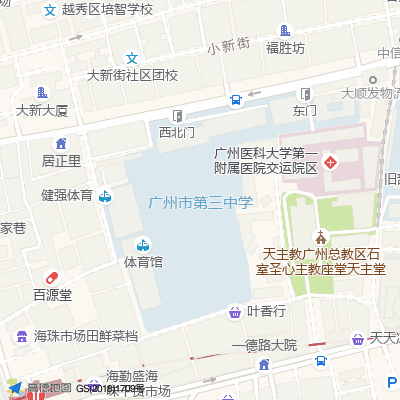

In [248]:
staticmap(location='113.258953,23.114944',zoom=16)

## 坐标转换

In [61]:
def coordsys(locations,coordsys='baidu',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/assistant/coordinate/convert?parameters'
    params={
        'key':'9f7b177f4227578e1842731c2bb198e6',
        'locations':'113.258953,23.114944',
        'coordsys':'baidu',
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data


In [62]:
baidu = coordsys('113.258953,23.114944')
baidu

{'status': '1',
 'info': 'ok',
 'infocode': '10000',
 'locations': '113.252470750171,23.108901960286'}

In [67]:
df_baidu = pd.json_normalize(baidu)
df_baidu

,status,info,infocode,locations
0,1,ok,10000,"113.252470750171,23.108901960286"


## 天气查询

### 实况天气

In [74]:
def lives(city,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/weather/weatherInfo?parameters'
    params={
        'key':'9f7b177f4227578e1842731c2bb198e6',
        'city':'310000',
        'extensions':'base',
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
weather = lives('310000')
weather

{'status': '1',
 'count': '1',
 'info': 'OK',
 'infocode': '10000',
 'lives': [{'province': '上海',
   'city': '上海市',
   'adcode': '310000',
   'weather': '阴',
   'temperature': '14',
   'winddirection': '东北',
   'windpower': '≤3',
   'humidity': '57',
   'reporttime': '2020-04-21 14:24:43'}]}

In [88]:
df_weather = pd.json_normalize(weather,record_path='forecasts')
df_weather # 内容被折叠

,city,adcode,province,reporttime,casts
0,上海市,310000,上海,2020-04-21 14:24:43,"[{'date': '2020-04-21', 'week': '2', 'dayweath..."


### 预报天气

In [77]:
def forest(city,extensions='all',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/weather/weatherInfo?parameters'
    params={
        'key':'9f7b177f4227578e1842731c2bb198e6',
        'city':'310000',
        'extensions':'all',
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
weather = forest('310000')
weather

{'status': '1',
 'count': '1',
 'info': 'OK',
 'infocode': '10000',
 'forecasts': [{'city': '上海市',
   'adcode': '310000',
   'province': '上海',
   'reporttime': '2020-04-21 14:24:43',
   'casts': [{'date': '2020-04-21',
     'week': '2',
     'dayweather': '阴',
     'nightweather': '阴',
     'daytemp': '16',
     'nighttemp': '10',
     'daywind': '东北',
     'nightwind': '东北',
     'daypower': '≤3',
     'nightpower': '≤3'},
    {'date': '2020-04-22',
     'week': '3',
     'dayweather': '阴',
     'nightweather': '阴',
     'daytemp': '19',
     'nighttemp': '11',
     'daywind': '东南',
     'nightwind': '东南',
     'daypower': '≤3',
     'nightpower': '≤3'},
    {'date': '2020-04-23',
     'week': '4',
     'dayweather': '阴',
     'nightweather': '多云',
     'daytemp': '18',
     'nighttemp': '10',
     'daywind': '北',
     'nightwind': '北',
     'daypower': '≤3',
     'nightpower': '≤3'},
    {'date': '2020-04-24',
     'week': '5',
     'dayweather': '多云',
     'nightweather': '晴',
     

In [115]:
df_weather = pd.json_normalize(weather,record_path='forecasts')
df_weather

,city,adcode,province,reporttime,casts
0,上海市,310000,上海,2020-04-21 14:24:43,"[{'date': '2020-04-21', 'week': '2', 'dayweath..."


## 输入提示

In [108]:
def tips(city=None,location=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/assistant/inputtips?parameters'
    params={
        'key':'9f7b177f4227578e1842731c2bb198e6',
        'keywords':'广州市第三中学',
        'types':'071300',
        'city':'440100',
        'location': '113.258953,23.114944',
        'citylimit':True,
        'datatype':'all',
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data


In [110]:
tip = tips('广州市第三中学')
tip

{'status': '1',
 'count': '10',
 'info': 'OK',
 'infocode': '10000',
 'tips': [{'id': 'B00140T9YK',
   'name': '广州市第三中学',
   'district': '广东省广州市越秀区',
   'adcode': '440104',
   'location': '113.258968,23.114932',
   'address': '大新路163号广州市第三中学体育馆',
   'typecode': '141202',
   'city': []},
  {'id': 'B00140T46O',
   'name': '广州市第三中学-体育馆',
   'district': '广东省广州市越秀区',
   'adcode': '440104',
   'location': '113.258349,23.114515',
   'address': '大新路163号',
   'typecode': '080101',
   'city': []},
  {'id': 'B0FFFQ0UYO',
   'name': '广州市第三中学(东门)',
   'district': '广东省广州市越秀区',
   'adcode': '440104',
   'location': '113.260088,23.116008',
   'address': '大新路163号',
   'typecode': '991400',
   'city': []},
  {'id': 'B0FFGFTM65',
   'name': '广州市第三中学(西北门)',
   'district': '广东省广州市越秀区',
   'adcode': '440104',
   'location': '113.258715,23.115789',
   'address': '大新路163号',
   'typecode': '991401',
   'city': []},
  {'id': 'B0FFFYYAU5',
   'name': '广州市第三中学停车场',
   'district': '广东省广州市越秀区',
   'adcode': '440104

In [117]:
df_tp = pd.json_normalize(tip,record_path='tips')
df_tp

,id,name,district,adcode,location,address,typecode,city
0,B00140T9YK,广州市第三中学,广东省广州市越秀区,440104,"113.258968,23.114932",大新路163号广州市第三中学体育馆,141202,[]
1,B00140T46O,广州市第三中学-体育馆,广东省广州市越秀区,440104,"113.258349,23.114515",大新路163号,080101,[]
2,B0FFFQ0UYO,广州市第三中学(东门),广东省广州市越秀区,440104,"113.260088,23.116008",大新路163号,991400,[]
3,B0FFGFTM65,广州市第三中学(西北门),广东省广州市越秀区,440104,"113.258715,23.115789",大新路163号,991401,[]
4,B0FFFYYAU5,广州市第三中学停车场,广东省广州市越秀区,440104,"113.258483,23.115553",大新路163号广州市第三中学,150904,[]
5,B0014086FC,从化区第三中学,广东省广州市从化区,440117,"113.604749,23.542639","江埔街大江路19号(原从化卫校斜对面,从化汽车站乘1路公交车可直达学校门口)",141202,[]
6,B0FFG9J0YH,广州市第三中学停车场(出入口),广东省广州市越秀区,440104,"113.258383,23.115725",大新路163号,150909,[]
7,B00141II0J,荔城街第三中学,广东省广州市增城区,440118,"113.800181,23.293119",荔城大道261号,141202,[]
8,B0FFLNB2VY,广州市第三中学仁爱楼,广东省广州市越秀区,440104,"113.258769,23.115774",[],141200,[]
9,B0FFG6VNS6,从化区第三中学(东北门),广东省广州市从化区,440117,"113.605021,23.543880",大江路19号,991401,[]


## 交通态势

### 矩形区域交通态势

In [122]:
def trafficinfo(rectangle,level=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/traffic/status/rectangle?parameters'
    params={
        'key':'9f7b177f4227578e1842731c2bb198e6',
        'rectangle':'113.258953,23.114944;113.260032,23.124473',
        'level':5,
        'extensions':'all',
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data


In [123]:
traffic = trafficinfo('113.258953,23.114944;113.260032,23.124473')
traffic

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '大新路：自东向西缓慢；大德路：省中医院附近自西向东行驶缓慢；光塔路：自西向东缓慢。',
  'evaluation': {'expedite': '40.00%',
   'congested': '60.00%',
   'blocked': '0.00%',
   'unknown': '0.00%',
   'status': '3',
   'description': '中度拥堵'},
  'roads': [{'name': '大新路',
    'status': '2',
    'direction': '从解放南路到人民南路',
    'angle': '191',
    'speed': '15',
    'lcodes': '-1400,-1398',
    'polyline': '113.262688,23.1166534;113.262474,23.1166439;113.261597,23.1164837;113.261055,23.1163731;113.260757,23.1163063;113.258842,23.115942;113.258057,23.1158047;113.257668,23.1157341;113.257202,23.115654;113.256241,23.1154709;113.255203,23.115284;113.255096,23.1152763;113.25415,23.1150665;113.253601,23.1149426;113.253494,23.1149254;113.253319,23.1149025;113.253014,23.1148624;113.2528,23.1148319'},
   {'name': '大德路',
    'status': '2',
    'direction': '从海珠南路到解放南路',
    'angle': '8',
    'speed': '25',
    'lcodes': '1163',
    'polyline': '113.255753,23

In [132]:
df_tra = pd.json_normalize(traffic,meta='roads')
df_tra

,status,info,infocode,trafficinfo.description,trafficinfo.evaluation.expedite,trafficinfo.evaluation.congested,trafficinfo.evaluation.blocked,trafficinfo.evaluation.unknown,trafficinfo.evaluation.status,trafficinfo.evaluation.description,trafficinfo.roads
0,1,OK,10000,大新路：自东向西缓慢；大德路：省中医院附近自西向东行驶缓慢；光塔路：自西向东缓慢。,40.00%,60.00%,0.00%,0.00%,3,中度拥堵,"[{'name': '大新路', 'status': '2', 'direction': '..."


## 地理围栏

### 新建围栏

In [194]:
def gid(name,center,radius=None,enable=None)->dict:
    key = '9f7b177f4227578e1842731c2bb198e6'
    url = 'https://restapi.amap.com/v4/geofence/meta?key=' + Key
    params={
        "name": "测试围栏名称",
        "center": 'longitude,latitude',
        "radius": "1000",
        "enable": "true",
        "valid_time": "2017-05-19",
        "repeat": "Mon,Tues,Wed,Thur,Fri,Sat,Sun",
        "time": "00:00,11:59;13:00,20:59",
        "desc": "测试围栏描述",
        "alert_condition": "enter;leave"    
    }
    r = requests.post(url,params)
    data = r.json()
    return data
r.status_code 

200

In [249]:
results = r.json()
results

{'errcode': 20003,
 'errdetail': '未知错误，请联系高德地图开放平台技术支持',
 'errmsg': 'UNKNOWN_ERROR'}

## 轨迹纠偏

In [ ]:
[{
"x": 116.449429,
"y": 40.014844,
"sp": 4,
"ag": 110,
"tm": 1478831753
}, {
"x": 116.449639,
"y": 40.014776,
"sp": 3,
"ag": 110,
"tm": 23
}, {
"x": 116.449859,
"y": 40.014716,
"sp": 3,
"ag": 111,
"tm": 33
}, {
"x": 116.450074,
"y": 40.014658,
"sp": 3,
"ag": 110,
"tm": 31
}, {
"x": 116.450273,
"y": 40.014598,
"sp": 3,
"ag": 111,
"tm": 20
}]